# CIFAR-10 Data Exploration

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from pathlib import Path

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

## 1. Load CIFAR-10 Dataset

In [2]:
def load_cifar10_batch(file_path):
    """Load a single batch of CIFAR-10 data"""
    with open(file_path, 'rb') as f:
        batch = pickle.load(f, encoding='bytes')
    return batch

def load_cifar10_data(data_dir):
    """Load all CIFAR-10 training and test data"""
    
    # Load training batches
    train_data = []
    train_labels = []
    
    for i in range(1, 6):
        batch_file = os.path.join(data_dir, f'data_batch_{i}')
        batch = load_cifar10_batch(batch_file)
        train_data.append(batch[b'data'])
        train_labels.extend(batch[b'labels'])
    
    # Concatenate all training batches
    train_data = np.vstack(train_data)
    train_labels = np.array(train_labels)
    
    # Load test batch
    test_batch = load_cifar10_batch(os.path.join(data_dir, 'test_batch'))
    test_data = test_batch[b'data']
    test_labels = np.array(test_batch[b'labels'])
    
    # Load metadata (class names)
    meta_file = os.path.join(data_dir, 'batches.meta')
    with open(meta_file, 'rb') as f:
        meta = pickle.load(f, encoding='bytes')
    class_names = [name.decode('utf-8') for name in meta[b'label_names']]
    
    return train_data, train_labels, test_data, test_labels, class_names

# Load the data
data_dir = '../data/cifar-10-batches-py'
train_data, train_labels, test_data, test_labels, class_names = load_cifar10_data(data_dir)

print(f"Training data shape: {train_data.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Test data shape: {test_data.shape}")
print(f"Test labels shape: {test_labels.shape}")
print(f"\nClass names: {class_names}")

Training data shape: (50000, 3072)
Training labels shape: (50000,)
Test data shape: (10000, 3072)
Test labels shape: (10000,)

Class names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


## 2. Reshape Images to 32x32x3 Format

In [3]:
def reshape_cifar10_images(data):
    """
    Reshape CIFAR-10 data from flat array to 32x32x3 images
    Input: (N, 3072) - flat array
    Output: (N, 32, 32, 3) - image format
    """
    # CIFAR-10 stores images as (3072,) where first 1024 is R, next 1024 is G, last 1024 is B
    num_images = data.shape[0]
    images = data.reshape(num_images, 3, 32, 32).transpose(0, 2, 3, 1)
    return images

# Reshape the data
train_images = reshape_cifar10_images(train_data)
test_images = reshape_cifar10_images(test_data)

print(f"Training images shape: {train_images.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Pixel value range: [{train_images.min()}, {train_images.max()}]")
print(f"Data type: {train_images.dtype}")

Training images shape: (50000, 32, 32, 3)
Test images shape: (10000, 32, 32, 3)
Pixel value range: [0, 255]
Data type: uint8


## 3. Visualize Sample Images

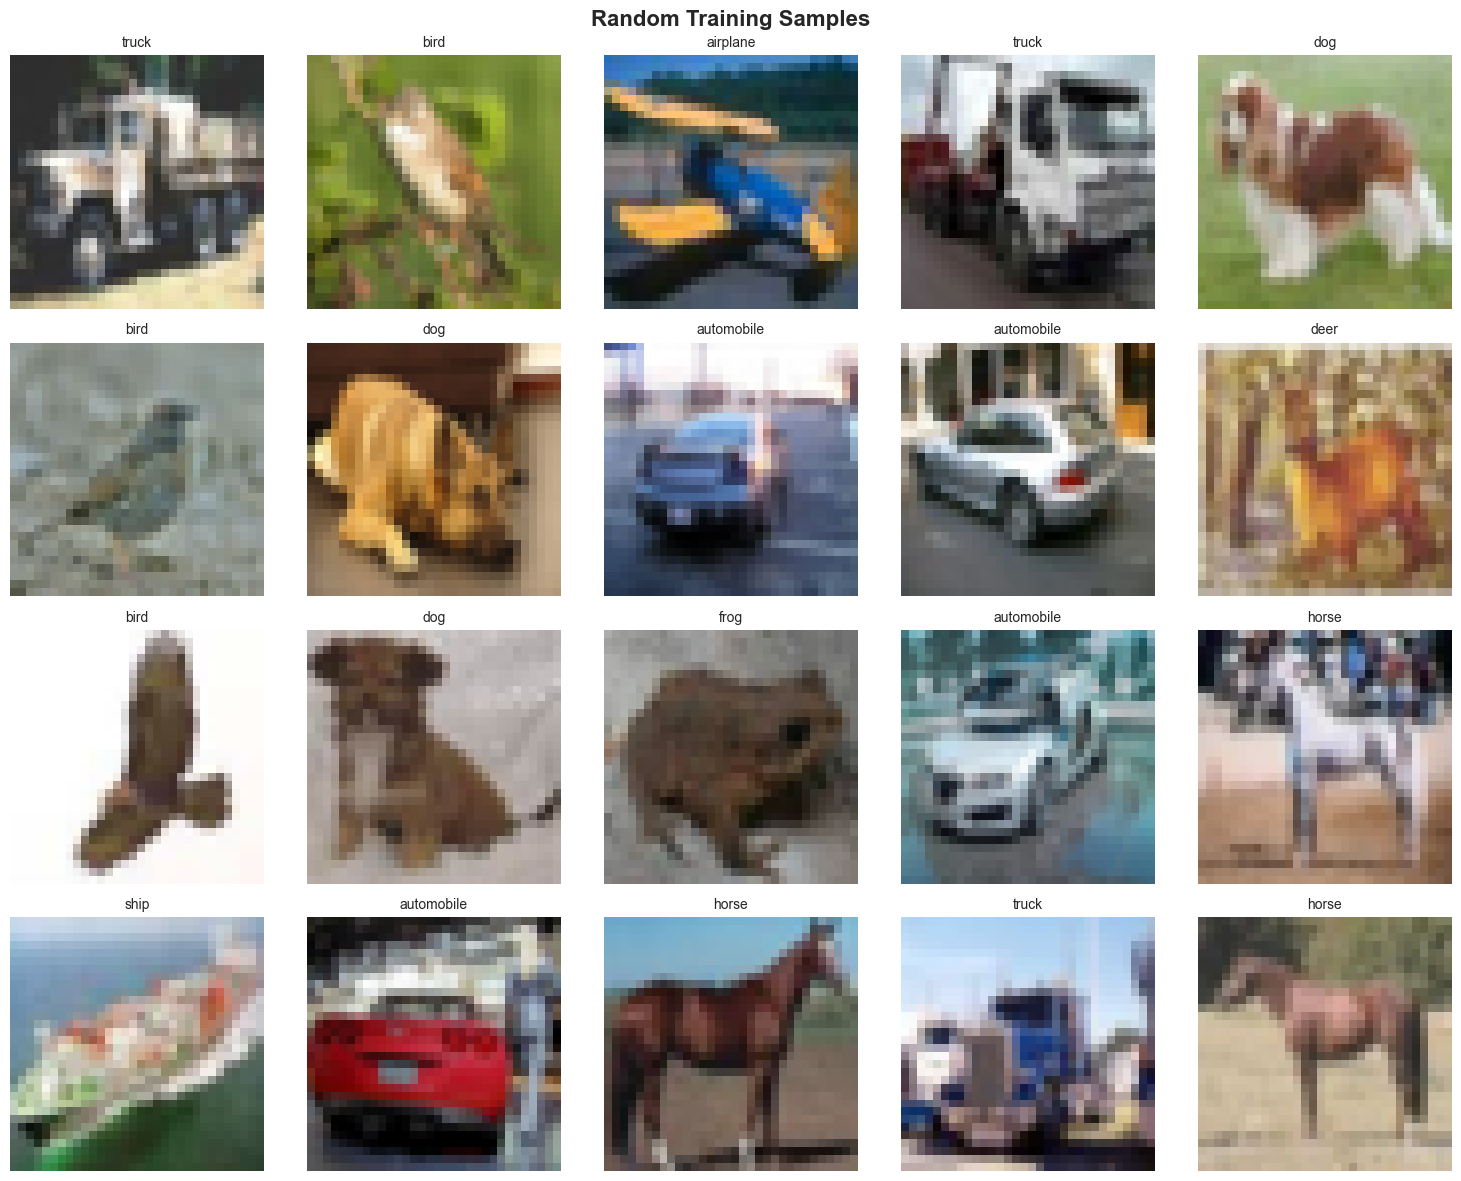

In [4]:
def visualize_samples(images, labels, class_names, num_samples=20, title="Sample Images"):
    """Visualize random samples from the dataset"""
    fig, axes = plt.subplots(4, 5, figsize=(15, 12))
    fig.suptitle(title, fontsize=16, fontweight='bold')
    
    # Randomly select samples
    indices = np.random.choice(len(images), num_samples, replace=False)
    
    for idx, ax in enumerate(axes.flat):
        img_idx = indices[idx]
        ax.imshow(images[img_idx])
        ax.set_title(f"{class_names[labels[img_idx]]}", fontsize=10)
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

# Visualize training samples
visualize_samples(train_images, train_labels, class_names, 
                 num_samples=20, title="Random Training Samples")

## 4. Class Distribution Analysis

Training Set Class Distribution:


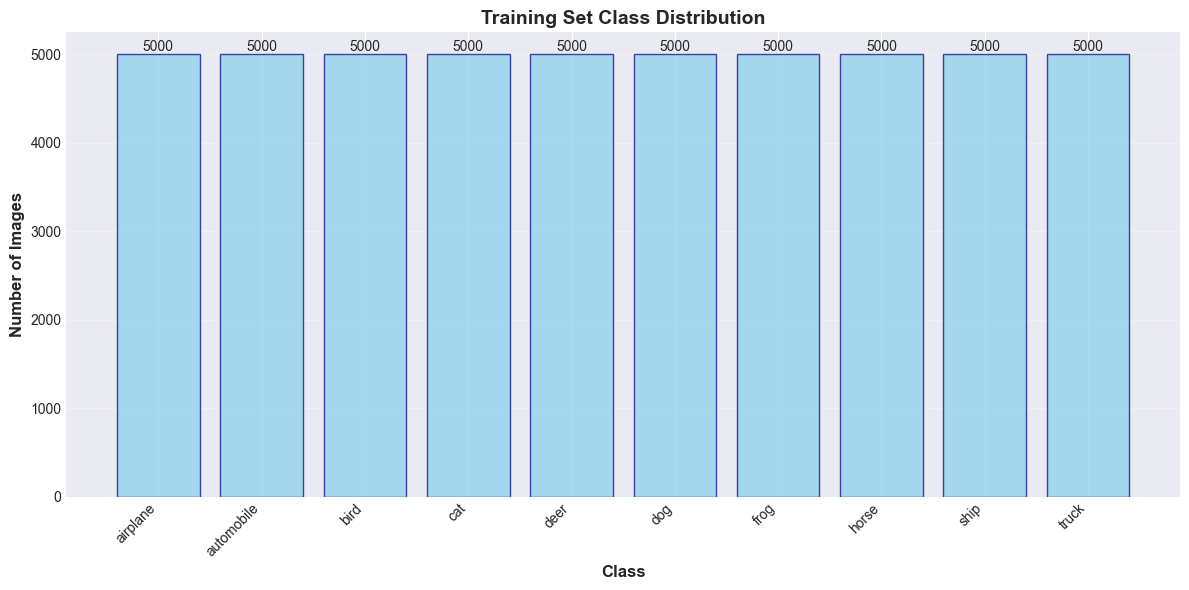


Test Set Class Distribution:


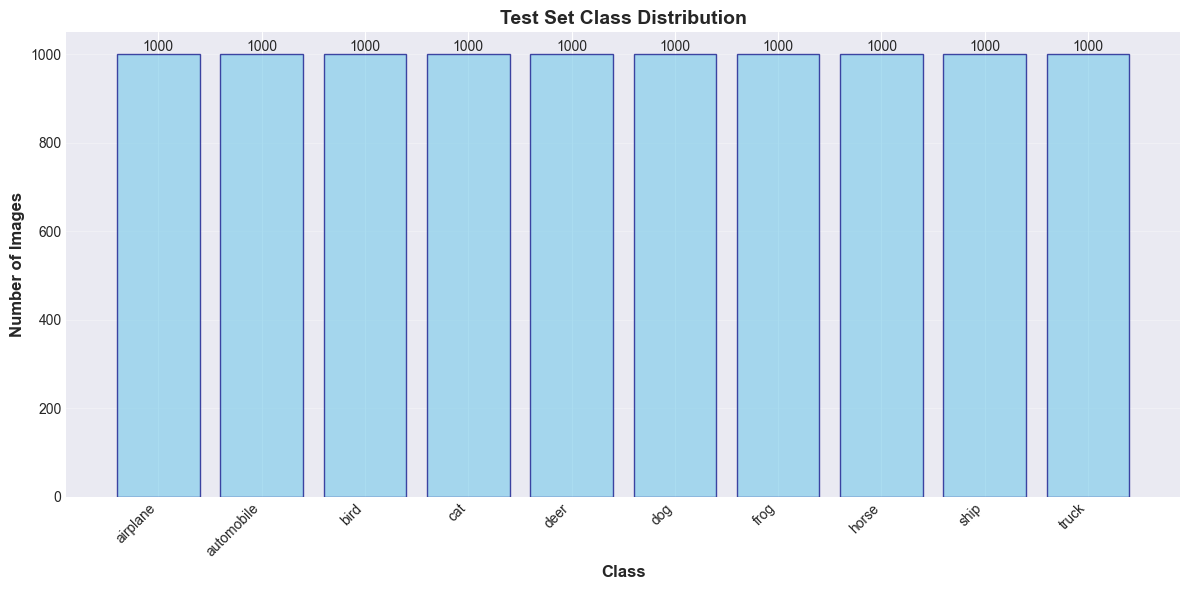

In [5]:
def plot_class_distribution(labels, class_names, title="Class Distribution"):
    """Plot the distribution of classes in the dataset"""
    unique, counts = np.unique(labels, return_counts=True)
    
    fig, ax = plt.subplots(figsize=(12, 6))
    bars = ax.bar(range(len(unique)), counts, color='skyblue', edgecolor='navy', alpha=0.7)
    ax.set_xlabel('Class', fontsize=12, fontweight='bold')
    ax.set_ylabel('Number of Images', fontsize=12, fontweight='bold')
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xticks(range(len(unique)))
    ax.set_xticklabels(class_names, rotation=45, ha='right')
    ax.grid(axis='y', alpha=0.3)
    
    # Add count labels on bars
    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{count}',
                ha='center', va='bottom', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    return dict(zip(class_names, counts))

# Plot distributions
print("Training Set Class Distribution:")
train_dist = plot_class_distribution(train_labels, class_names, "Training Set Class Distribution")

print("\nTest Set Class Distribution:")
test_dist = plot_class_distribution(test_labels, class_names, "Test Set Class Distribution")

## 5. Pixel Statistics and Distribution

In [6]:
# Calculate pixel statistics
print("=== Pixel Statistics ===\n")
print("Training Set:")
print(f"  Mean: {train_images.mean():.2f}")
print(f"  Std:  {train_images.std():.2f}")
print(f"  Min:  {train_images.min()}")
print(f"  Max:  {train_images.max()}")

print("\nTest Set:")
print(f"  Mean: {test_images.mean():.2f}")
print(f"  Std:  {test_images.std():.2f}")
print(f"  Min:  {test_images.min()}")
print(f"  Max:  {test_images.max()}")

# Per-channel statistics
print("\n=== Per-Channel Statistics (Training Set) ===")
for i, channel in enumerate(['Red', 'Green', 'Blue']):
    channel_data = train_images[:, :, :, i]
    print(f"\n{channel} Channel:")
    print(f"  Mean: {channel_data.mean():.2f}")
    print(f"  Std:  {channel_data.std():.2f}")

=== Pixel Statistics ===

Training Set:
  Mean: 120.71
  Std:  64.15
  Min:  0
  Max:  255

Test Set:
  Mean: 121.53
  Std:  64.06
  Min:  0
  Max:  255

=== Per-Channel Statistics (Training Set) ===

Red Channel:
  Mean: 125.31
  Std:  62.99

Green Channel:
  Mean: 122.95
  Std:  62.09

Blue Channel:
  Mean: 113.87
  Std:  66.70


## 6. Pixel Value Distribution Visualization

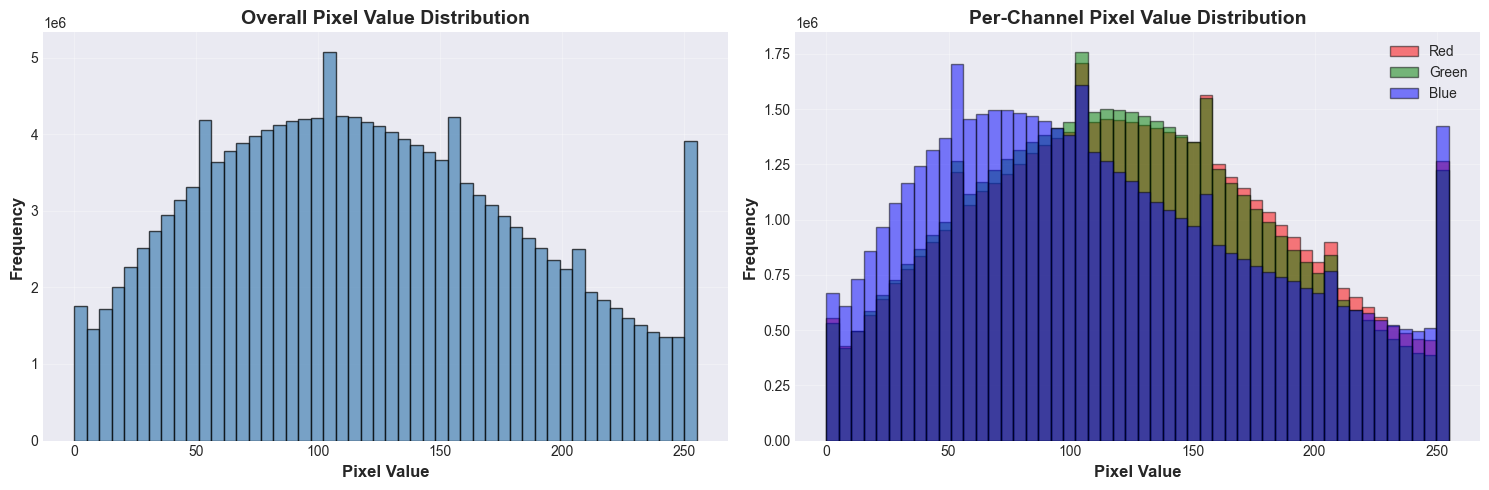

In [7]:
# Plot pixel value distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Overall distribution
axes[0].hist(train_images.flatten(), bins=50, color='steelblue', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Pixel Value', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[0].set_title('Overall Pixel Value Distribution', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3)

# Per-channel distribution
colors = ['red', 'green', 'blue']
for i, (channel, color) in enumerate(zip(['Red', 'Green', 'Blue'], colors)):
    channel_data = train_images[:, :, :, i].flatten()
    axes[1].hist(channel_data, bins=50, alpha=0.5, label=channel, color=color, edgecolor='black')

axes[1].set_xlabel('Pixel Value', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[1].set_title('Per-Channel Pixel Value Distribution', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Visualize Samples from Each Class

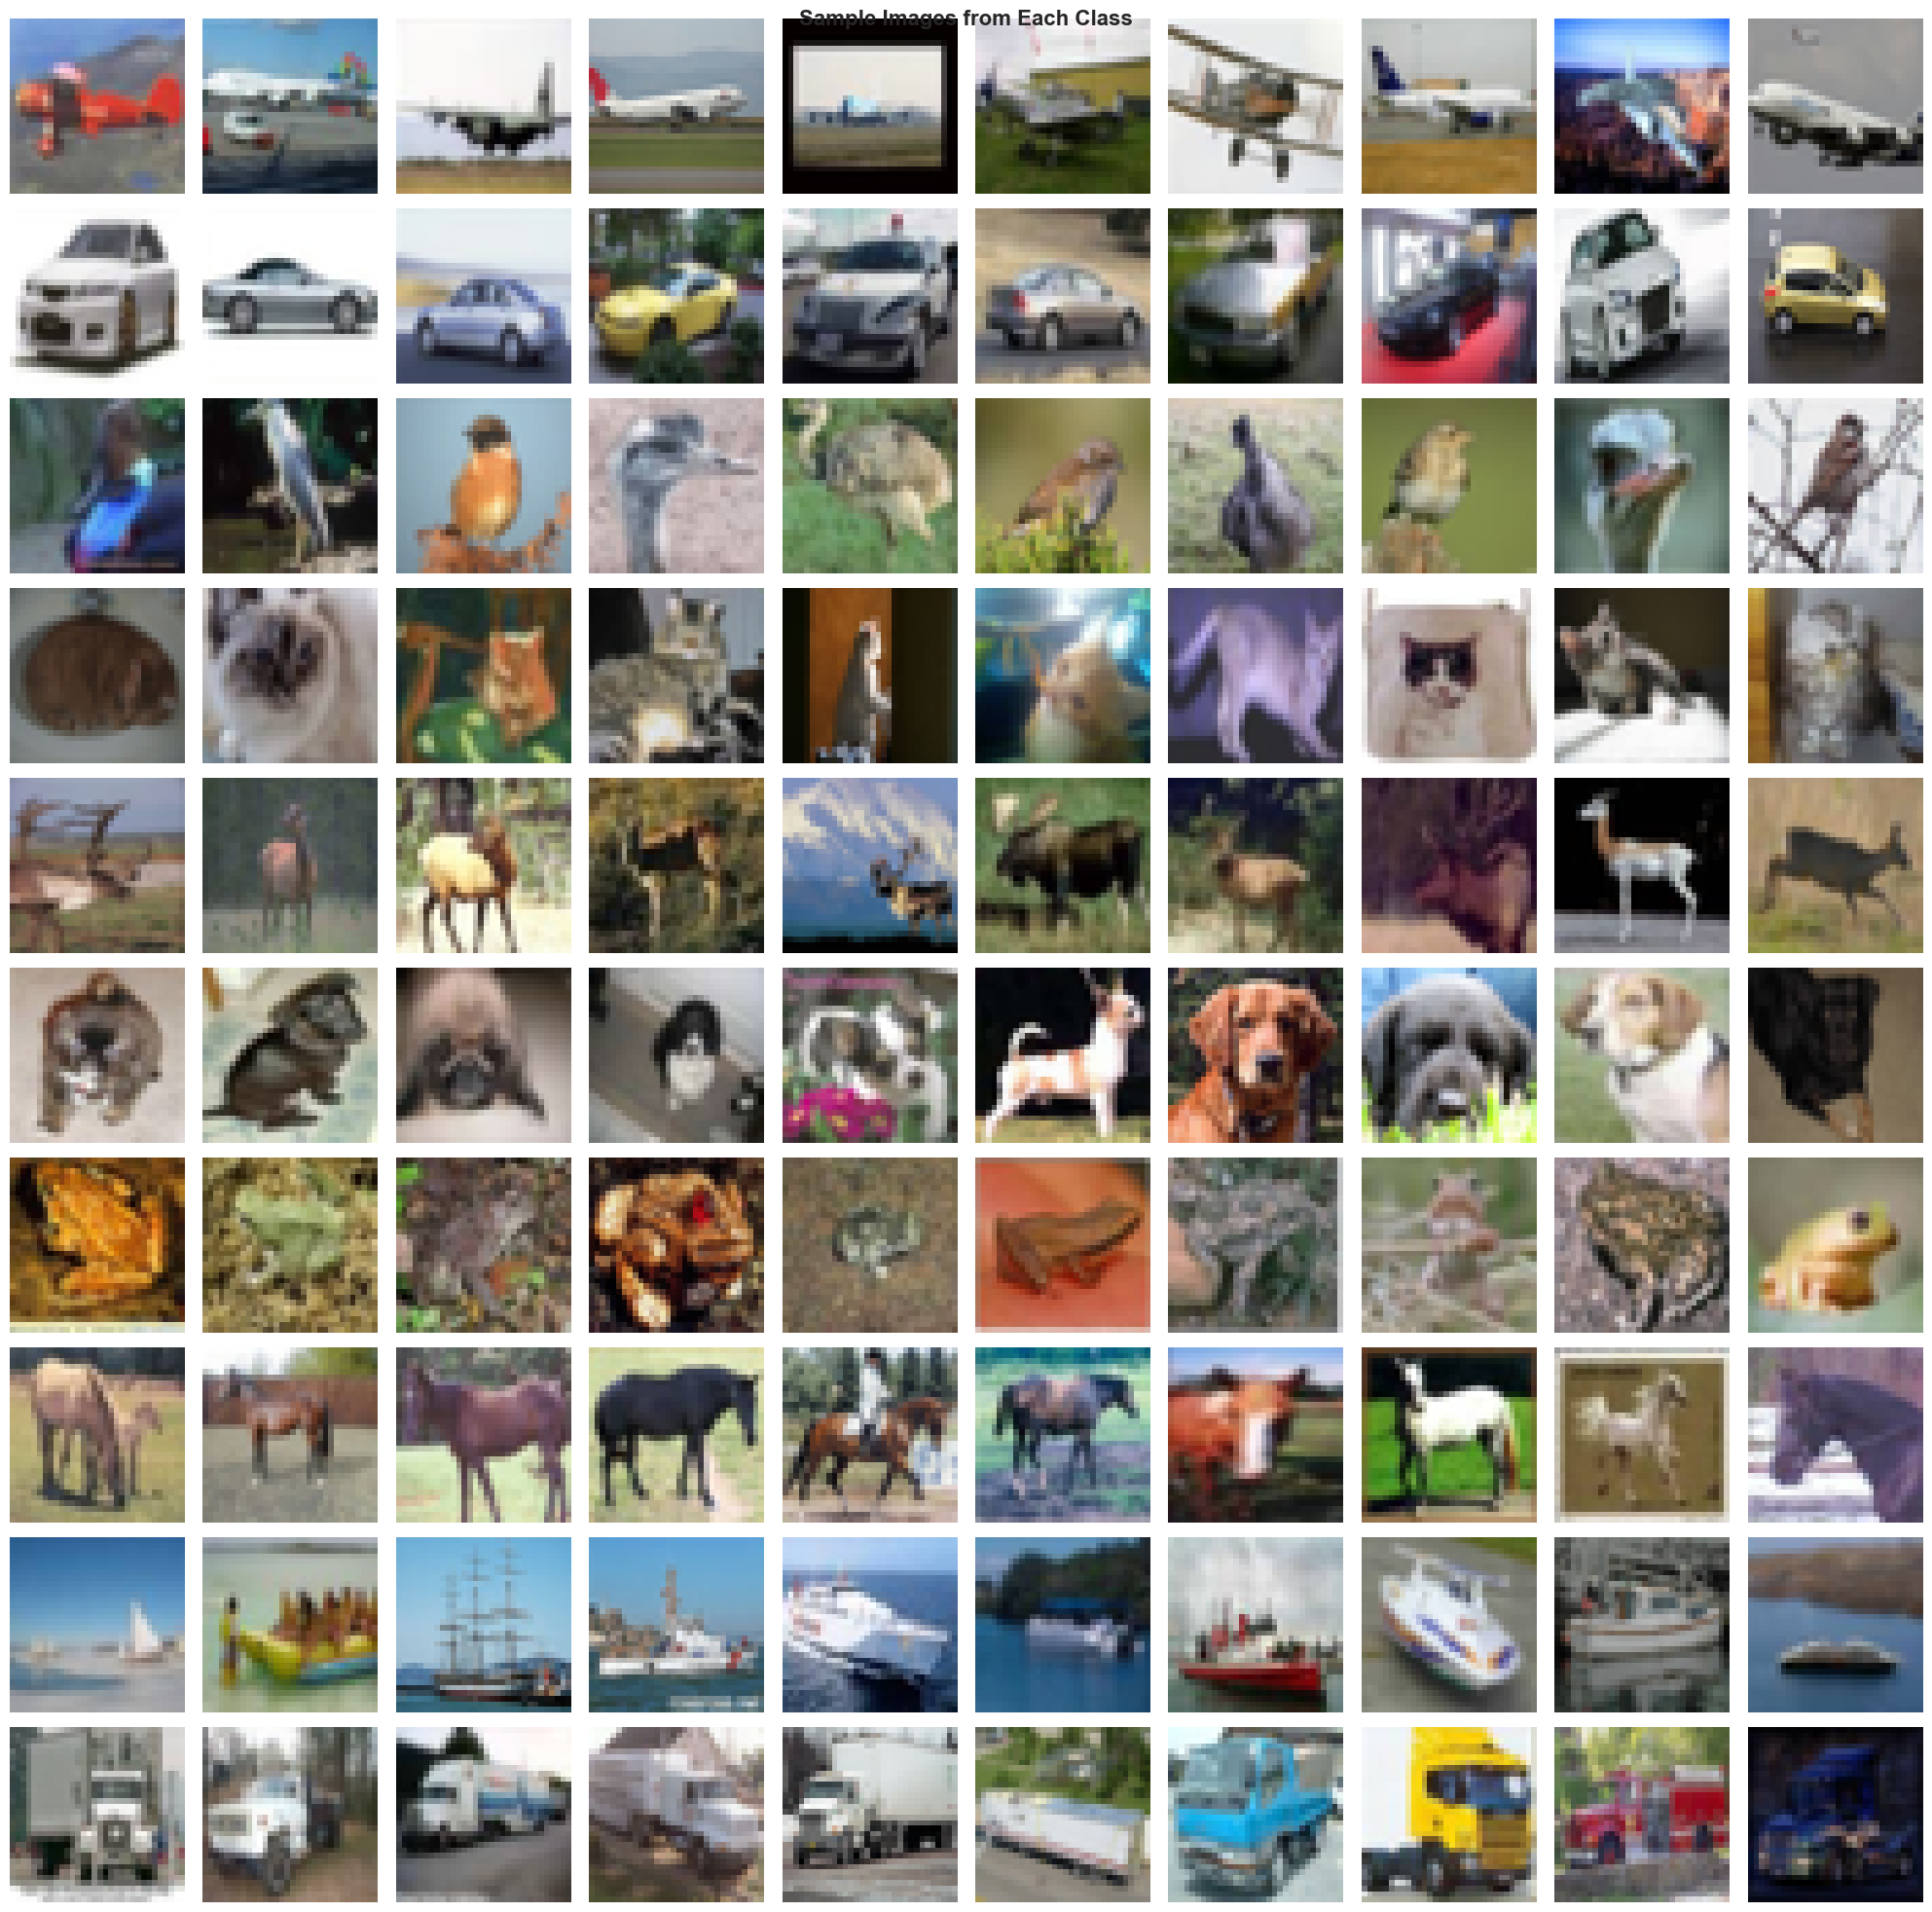

In [8]:
def visualize_class_samples(images, labels, class_names, samples_per_class=10):
    """Visualize samples from each class"""
    num_classes = len(class_names)
    fig, axes = plt.subplots(num_classes, samples_per_class, figsize=(20, 20))
    fig.suptitle('Sample Images from Each Class', fontsize=16, fontweight='bold')
    
    for class_idx in range(num_classes):
        # Get indices for this class
        class_indices = np.where(labels == class_idx)[0]
        # Randomly select samples
        selected_indices = np.random.choice(class_indices, samples_per_class, replace=False)
        
        for col_idx, img_idx in enumerate(selected_indices):
            ax = axes[class_idx, col_idx]
            ax.imshow(images[img_idx])
            ax.axis('off')
            
            # Add class name label on the first image of each row
            if col_idx == 0:
                ax.set_ylabel(class_names[class_idx], fontsize=12, fontweight='bold', rotation=0, 
                            ha='right', va='center')
    
    plt.tight_layout()
    plt.show()

# Visualize samples from each class
visualize_class_samples(train_images, train_labels, class_names, samples_per_class=10)

## 8. Image Brightness and Contrast Analysis

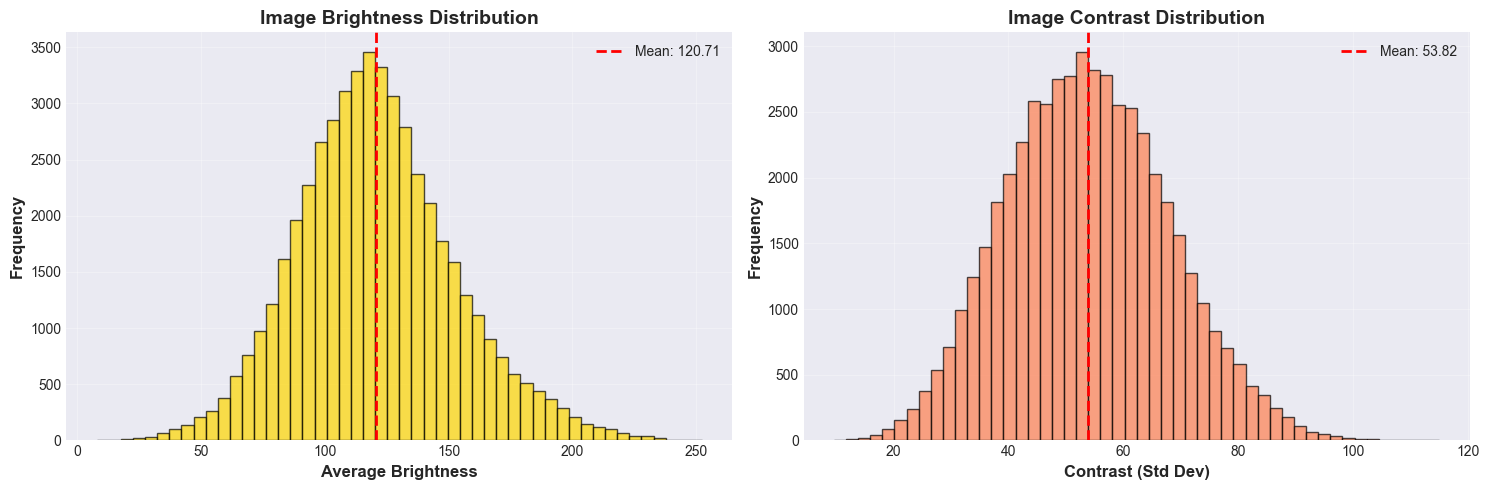

Brightness - Mean: 120.71, Std: 31.94
Contrast - Mean: 53.82, Std: 14.09


In [9]:
# Calculate brightness (mean intensity) and contrast (std) for each image
brightness = train_images.mean(axis=(1, 2, 3))
contrast = train_images.std(axis=(1, 2, 3))

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Brightness distribution
axes[0].hist(brightness, bins=50, color='gold', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Average Brightness', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[0].set_title('Image Brightness Distribution', fontsize=14, fontweight='bold')
axes[0].axvline(brightness.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {brightness.mean():.2f}')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Contrast distribution
axes[1].hist(contrast, bins=50, color='coral', alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Contrast (Std Dev)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[1].set_title('Image Contrast Distribution', fontsize=14, fontweight='bold')
axes[1].axvline(contrast.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {contrast.mean():.2f}')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Brightness - Mean: {brightness.mean():.2f}, Std: {brightness.std():.2f}")
print(f"Contrast - Mean: {contrast.mean():.2f}, Std: {contrast.std():.2f}")

## 9. Summary Statistics

In [10]:
print("=" * 60)
print("CIFAR-10 DATASET SUMMARY")
print("=" * 60)
print(f"\nDataset Size:")
print(f"  Training samples:   {len(train_images):,}")
print(f"  Test samples:       {len(test_images):,}")
print(f"  Total samples:      {len(train_images) + len(test_images):,}")

print(f"\nImage Properties:")
print(f"  Image dimensions:   32 x 32 x 3 (RGB)")
print(f"  Pixel value range:  [0, 255]")
print(f"  Data type:          {train_images.dtype}")

print(f"\nClasses:")
print(f"  Number of classes:  {len(class_names)}")
print(f"  Class names:        {', '.join(class_names)}")
print(f"  Distribution:       Balanced (5,000 per class in train, 1,000 per class in test)")

print(f"\nData Characteristics:")
print(f"  Mean pixel value:   {train_images.mean():.2f}")
print(f"  Std deviation:      {train_images.std():.2f}")
print(f"  Avg brightness:     {brightness.mean():.2f}")
print(f"  Avg contrast:       {contrast.mean():.2f}")

print("\n" + "=" * 60)
print("Note: While this dataset contains class labels, they will NOT")
print("be used for training the generative models (unsupervised learning).")
print("=" * 60)

CIFAR-10 DATASET SUMMARY

Dataset Size:
  Training samples:   50,000
  Test samples:       10,000
  Total samples:      60,000

Image Properties:
  Image dimensions:   32 x 32 x 3 (RGB)
  Pixel value range:  [0, 255]
  Data type:          uint8

Classes:
  Number of classes:  10
  Class names:        airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck
  Distribution:       Balanced (5,000 per class in train, 1,000 per class in test)

Data Characteristics:
  Mean pixel value:   120.71
  Std deviation:      64.15
  Avg brightness:     120.71
  Avg contrast:       53.82

Note: While this dataset contains class labels, they will NOT
be used for training the generative models (unsupervised learning).
